# PARTIE 2 : Entraînement d'un modèle de base

Nous sommes dans un problème de classification binaire.

Nous cherchons à prédire une classe : 0 ou 1.

## Import librairies

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

## Import des données

In [100]:
dataset = pd.read_csv('./src/dataset_for_ml.csv')
print(dataset.shape)
dataset.head()

(278449, 6)


,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


## Preprocessings Sklearn

In [101]:
# Separate target variable y from features X:
target_variable = 'converted'
print('Separating labels from features...')
y = dataset.loc[:,target_variable]
X = dataset.drop(target_variable, axis = 1)
print('...Done')
print()
print('y:')
print(y.head())
print()
print('X:')
print(X.head())
print()

# Divide dataset into train set and test set:
print('Dividing into train set and test set...')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
print('...Done')
print()

# Distinguish numeric and categorical features:
numeric_features = ['age', 'total_pages_visited']
categorical_features = ['country', 'new_user', 'source']

# Create pipeline for numeric features:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create pipeline for categorical features:
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first'))
])

# Use ColumnTransformer to male a preprocessor object that describe all the treatments to be done:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

Separating labels from features...
...Done

y:
0    0
1    0
2    1
3    0
4    0
Name: converted, dtype: int64

X:
   country  age  new_user  source  total_pages_visited
0    China   22         1  Direct                    2
1       UK   21         1     Ads                    3
2  Germany   20         0     Seo                   14
3       US   23         1     Seo                    3
4       US   28         1  Direct                    3

Dividing into train set and test set...
...Done



## Application des preprocessings

In [102]:
# Preprocessings on train set:
print('Performing preprocessings on train set...')
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done')
print(X_train[0:5])
print()

# Preprocessings on test set:
print('Performing preprocessings on test set:')
print(X_test.head())
X_test = preprocessor.transform(X_test)
print('...Done')
print(X_test[0:5])
print()

Performing preprocessings on train set...
       country  age  new_user  source  total_pages_visited
49557       UK   43         1     Seo                    3
20736       UK   18         1  Direct                    7
93300    China   28         1     Seo                    3
23800       US   36         0     Seo                    2
160341   China   35         1     Ads                   10
...Done
[[ 1.53748968 -0.56956072  0.          1.          0.          1.
   0.          1.        ]
 [-1.54684614  0.82018113  0.          1.          0.          1.
   1.          0.        ]
 [-0.31311181 -0.56956072  0.          0.          0.          1.
   0.          1.        ]
 [ 0.67387565 -0.91699619  0.          0.          1.          0.
   0.          1.        ]
 [ 0.55050221  1.86248752  0.          0.          0.          1.
   0.          0.        ]]

Performing preprocessings on test set:
       country  age  new_user  source  total_pages_visited
26611       UK   26         0  

## Entraînement d'un modèle de classification de base

Nous entraînons un modèle de classification de base soit une régression logistique.

In [103]:
# Model training:
classifier = LogisticRegression(max_iter = 1000)
print('Training model...')
classifier.fit(X_train, y_train)
print('...Done')

Training model...
...Done


## Prédictions

In [104]:
# Predictions on training set:
print("Predictions on training set...")
y_train_pred = classifier.predict(X_train)
print("...Done.")
print(y_train_pred)
print()

# Predictions on test set:
print("Predictions on test set...")
y_test_pred = classifier.predict(X_test)
print("...Done.")
print(y_test_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



## Résultats et performance

In [105]:
# Print scores:
print(f'Train accuracy: {classifier.score(X_train, y_train)}')
print(f'Test accuracy: {classifier.score(X_test, y_test)}')

Train accuracy: 0.9873123531403594
Test accuracy: 0.9874663314778237


In [106]:
# Cross-validation:
# Let's see the scores with a cross-validation of k=100
scores = cross_val_score(classifier, X_train, y_train, cv=100)
avg = scores.mean()
std = scores.std()
print(f'Cross-validated accuracy: {avg}')
print(f'Standard deviation: {std}')

Cross-validated accuracy: 0.9873277446685347
Standard deviation: 0.00182467958779592


## Choix des métriques

Notre jeu de données n'est pas équilibré. Le taux de conversion est très faible.

Seulement 1.65% des visiteurs souscrivent à la newsletter, 98.35% des visiteurs ne souscrivent pas.

Par conséquent l'accuracy n'est pas une bonne métrique pour mesurer la performance du modèle. 

--> Nous devons regarder le F1 score et la matrice de confusion.

In [107]:
# Print scores:
print("f1-score on train set: ", f1_score(y_train, y_train_pred, average = 'macro'))
print("f1-score on test set: ", f1_score(y_test, y_test_pred, average = 'macro'))

f1-score on train set:  0.7470397595361735
f1-score on test set:  0.7520854124360203


--> On remarque que le F1 score n'est pas aussi bon que l'accuracy.

In [108]:
# Print classification report:
print('Classification report on train set:')
print(classification_report(y_train, y_train_pred))
print('Classification report on test set:')
print(classification_report(y_test, y_test_pred))

Classification report on train set:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    191699
           1       0.71      0.39      0.50      3215

    accuracy                           0.99    194914
   macro avg       0.85      0.69      0.75    194914
weighted avg       0.99      0.99      0.99    194914

Classification report on test set:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     82157
           1       0.72      0.40      0.51      1378

    accuracy                           0.99     83535
   macro avg       0.85      0.70      0.75     83535
weighted avg       0.99      0.99      0.99     83535



### Rapport de classification :

- **Précision** : sur tous les utilisateurs dont le modèle prévoyait qu'ils s'abonneraient à la newsletter, seuls 71 % l'ont effectivement fait

- **Recall**: sur tous les utilisateurs réellement abonnés à la newsletter, le modèle n'a prédit correctement ce résultat que pour 39 % de ces utilisateurs

- **F1 score** : il résulte un F1 score de 0,5 pour la classe 1 soit la prédiction qu'un utilisateur s'abonnerait

--> Le modèle est bon pour prédire lorsqu'un utilisateur ne s'abonnerait pas. En revanche il est mauvais pour prédire lorsqu'un utilisateur s'abonnerait.

## Matrice de confusion

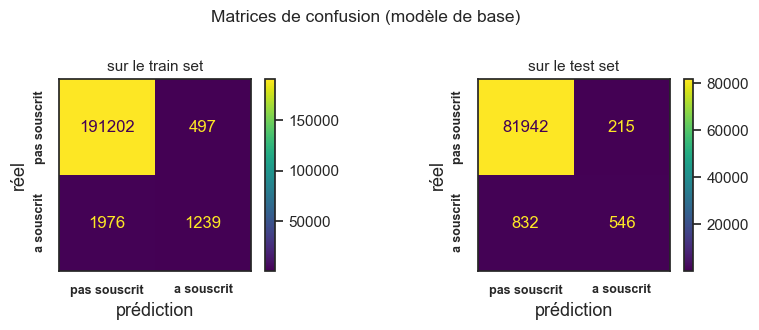

In [135]:
sns.set(rc={'figure.figsize':(9, 3)}, style='white')
fig, axes = plt.subplots(1, 2)
fig.subplots_adjust(hspace=0.125, wspace=0.5)

ConfusionMatrixDisplay.from_estimator(classifier, X_train, y_train, ax = axes[0])
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax = axes[1])

fig.suptitle('Matrices de confusion (modèle de base)', fontsize=12.5)
fig.subplots_adjust(top=.75)

axes[0].set_title('sur le train set', fontsize=11)
axes[1].set_title('sur le test set', fontsize=11)

axes[0].set_xlabel('prédiction', fontsize=13)
axes[1].set_xlabel('prédiction', fontsize=13)
axes[0].set_ylabel('réel', fontsize=13)
axes[1].set_ylabel('réel', fontsize=13)

axes[0].set_xticks([0,1], ['pas souscrit', 'a souscrit'], fontsize=9, fontweight='bold')
axes[1].set_xticks([0,1], ['pas souscrit', 'a souscrit'], fontsize=9, fontweight='bold')
axes[0].set_yticks([0,1], ['pas souscrit', 'a souscrit'], fontsize=9, rotation=90, va='center', fontweight='bold')
axes[1].set_yticks([0,1], ['pas souscrit', 'a souscrit'], fontsize=9, rotation=90, va='center', fontweight='bold')

plt.show()

### Résultats :

Les matrices de confusion confirment les résultats du rapport de classification :

- Elles montrent que le modèle de base est efficace pour prédire la classe 0 (prédire que l'utilisateur ne s'abonnera pas) ;

- Mais il n'est pas bon pour prédire la classe 1 (prédire que l'utilisateur s'abonnera) ;

- Il passe à coté de vrais positifs, et prédit des faux positifs.


## Importance des features

Nous examinons comment le modèle de base pondère les features pour faire ses prédictions.

In [111]:
# Get the names and coefficients of the features:
feature_names_out = preprocessor.get_feature_names_out()
feature_names = [fname for fname in feature_names_out]
coefs = pd.DataFrame(index = feature_names, data = classifier.coef_.transpose(), columns=["coefficients"])

In [112]:
feature_importance = coefs.sort_values(by='coefficients', ascending=False)
feature_importance

,coefficients
cat__country_Germany,3.289475
cat__country_UK,3.075964
cat__country_US,2.734379
num__total_pages_visited,2.177316
cat__source_Seo,0.053833
cat__source_Direct,-0.118909
num__age,-0.623408
cat__new_user_1,-1.676228


In [113]:
negative_coefs = feature_importance[feature_importance['coefficients']<0]

In [114]:
# Compute abs() and sort values:
feature_importance_abs = abs(coefs).sort_values(by='coefficients', ascending=False)
feature_importance_abs = feature_importance_abs.transpose()
feature_importance_abs

,cat__country_Germany,cat__country_UK,cat__country_US,num__total_pages_visited,cat__new_user_1,num__age,cat__source_Direct,cat__source_Seo
coefficients,3.289475,3.075964,2.734379,2.177316,1.676228,0.623408,0.118909,0.053833


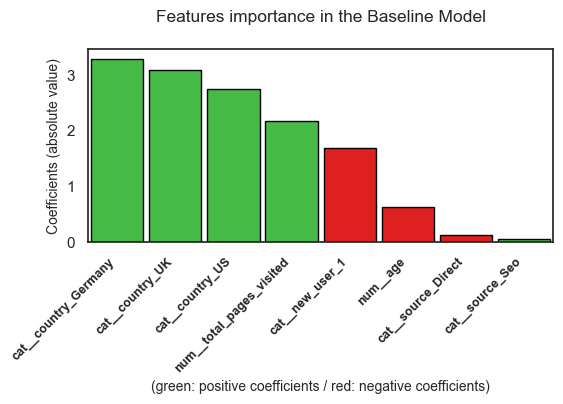

In [129]:
# Plot coefficients (in absolute value):
import seaborn as sns
import matplotlib.pyplot as plt 

colors = ['red' if y in negative_coefs.index else 'limegreen' for y in feature_importance_abs.columns]
sns.set(rc={'figure.figsize':(6, 2.5)}, style='white')
sns.barplot(data = feature_importance_abs,orient = 'v', palette = colors, width = .9, edgecolor = 'black')
plt.title('Features importance in the Baseline Model', fontsize=12.5, pad=20)
plt.xlabel('(green: positive coefficients / red: negative coefficients)', fontsize=10)
plt.ylabel('Coefficients (absolute value)', fontsize=10)
plt.xticks(fontsize=9, fontweight='bold', rotation=45, ha='right')
plt.xticks(feature_importance_abs.columns, fontsize=9, fontweight='bold', rotation=45, ha="right")
plt.legend('', frameon=False)
plt.show()

### Résultats : 

- On observe que le modèle maximise surtout les variables de pays.

- Le nombre de pages visitées n'arrive qu'en 4e position pour le modèle de base.